## 1. Import packages

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math

## 2. Location - Latitude, Longitude

In [211]:
dir = "wind_2019040501~2019040600/"
wind_file = os.listdir(dir)

print(wind_file)
print("The number of wind dataset :", len(wind_file))

['100.csv', '101.csv', '102.csv', '104.csv', '105.csv', '106.csv', '108.csv', '112.csv', '114.csv', '115.csv', '119.csv', '121.csv', '127.csv', '129.csv', '130.csv', '131.csv', '133.csv', '135.csv', '136.csv', '137.csv', '138.csv', '140.csv', '143.csv', '146.csv', '152.csv', '155.csv', '156.csv', '159.csv', '162.csv', '165.csv', '168.csv', '169.csv', '170.csv', '172.csv', '174.csv', '175.csv', '177.csv', '184.csv', '185.csv', '188.csv', '192.csv', '201.csv', '202.csv', '203.csv', '211.csv', '212.csv', '216.csv', '217.csv', '221.csv', '226.csv', '232.csv', '235.csv', '236.csv', '238.csv', '243.csv', '244.csv', '245.csv', '247.csv', '248.csv', '251.csv', '252.csv', '253.csv', '254.csv', '255.csv', '257.csv', '258.csv', '259.csv', '260.csv', '261.csv', '262.csv', '263.csv', '264.csv', '266.csv', '268.csv', '271.csv', '272.csv', '273.csv', '276.csv', '277.csv', '278.csv', '279.csv', '281.csv', '283.csv', '284.csv', '285.csv', '288.csv', '289.csv', '294.csv', '295.csv', '90.csv', '93.csv', 

In [212]:
wind_list = pd.read_csv('latitude,longitude.csv', encoding = 'cp949')

In [213]:
wind_list

,위치,Unnamed: 1
0,서울(108),37.57142? 126.9658
1,부산(159),35.10468? 129.03203
2,대구(143),35.87797? 128.65296
3,강화(201),37.70739? 126.44634
4,백령도(102),37.97396? 124.71237
...,...,...
87,함양군(264),35.51138? 127.74538
88,합천(285),35.56505? 128.16994
89,고산(185),33.29382? 126.16283
90,성산(188),33.38677? 126.8802


In [214]:
r_list = wind_list.values[:,0]
r_list[:5]

array(['서울(108)', '부산(159)', '대구(143)', '강화(201)', '백령도(102)'],
      dtype=object)

In [215]:
list = []
kor_list = []
for item in r_list:
    
    item_mod = item.split('(')
    kor = item_mod[0]
    item_mod = item_mod[1].replace(')', "")

    list.append(int(item_mod))
    kor_list.append(kor)
    
list = np.array(list)  
kor_list = np.array(kor_list)

In [216]:
r_data = wind_list.values[:,1]
r_data[:5]

array(['  37.57142?  126.9658', '  35.10468?  129.03203',
       '  35.87797?  128.65296', '  37.70739?  126.44634',
       '  37.97396?  124.71237'], dtype=object)

In [217]:
latitude = []
longitude = []
for item in r_data:

    item_mod = item.replace("?  ", " ")
    item_mod = item_mod.replace("  ", "")
    item_mod = item_mod.split()

    latitude.append(float(item_mod[0]))
    longitude.append(float(item_mod[1]))
    
latitude = np.array(latitude)    
longitude = np.array(longitude)  

In [218]:
print(list)
print(kor_list)
print(latitude)
print(longitude)

[108 159 143 201 102 112 156 133 152  98 119 202 203  99 105 100 106 104
  93  90 121 114 211 217  95 101 216 212 226 221 131 135 127 238 235 236
 129 232 172 251 140 247 243 254 244 248 146 245 259 262 266 165 258 174
 168 252 170 260 175 268 261 169 279 273 271 137 136 277 272 281 115 130
 278 276 138 294 284 253 295 285 255 289 257 263 192 155 162 264 285 185
 188 184]
['서울' '부산' '대구' '강화' '백령도' '인천' '광주' '대전' '울산' '동둥천' '수원' '양평' '이천' '파주'
 '강릉' '대관령' '동해' '북강릉' '북춘천' '속초' '영월' '원주' '인제' '정선군' '철월' '춘천' '태백' '홍천'
 '보은' '제천' '청주' '추풍령' '충주' '금산' '보령' '부여' '서산' '천안' '고창' '고창군' '군산' '남원'
 '부안' '순창군' '임실' '장수' '전주' '정읍' '강진군' '고흥' '광양시' '목포' '보성군' '순천' '여수'
 '영광군' '완도' '장흥' '진도' '진도군' '해남' '흑산도' '구미' '문경' '봉화' '상주' '안동' '영덕' '영주'
 '영천' '울릉도' '울진' '의성' '청송군' '포항' '거제' '거창' '김해시' '남해' '밀양' '북창원' '산청'
 '양산시' '의령군' '진주' '창원' '통영' '함양군' '합천' '고산' '성산' '제주']
[37.57142 35.10468 35.87797 37.70739 37.97396 37.47772 35.17294 36.37198
 35.58237 37.90188 37.25746 37.48863 37.26399 37.88589 37.8858

In [219]:
print("Num of latitude :", latitude.shape)
print("Num of longitude :", longitude.shape)
print("Num of list :", list.shape)
print("Num of kor_list", kor_list.shape)

Num of latitude : (92,)
Num of longitude : (92,)
Num of list : (92,)
Num of kor_list (92,)


### 2-1. Convert latitude, longitude to x, y positions

In [221]:
latitude = np.reshape(latitude, (1,92))
longitude = np.reshape(longitude, (1,92))

x = np.cos(longitude) * np.sin(90-latitude)
y = np.sin(90-latitude) * np.sin(longitude)

In [222]:
scaled_x = ((x - np.min(x)) / (np.max(x) - np.min(x))) * 100
scaled_y = ((y - np.min(y)) / (np.max(y) - np.min(y))) * 100

np.max(scaled_y)

100.0

### 2-2. Visualization

In [223]:
# matplotlib korean
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

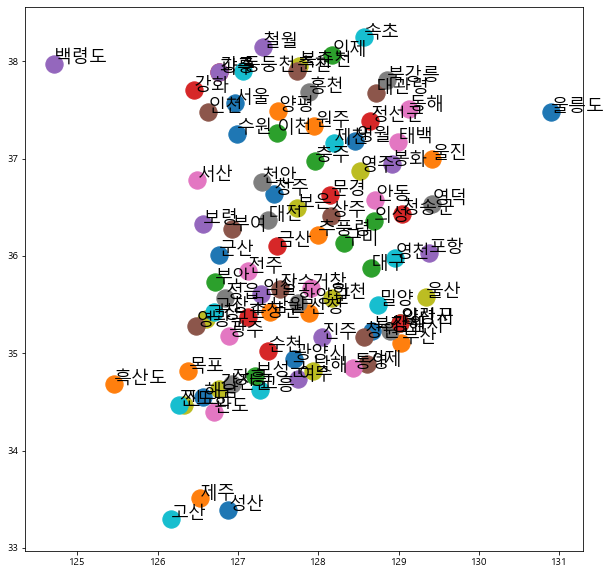

In [224]:
plt.figure(figsize=(10, 10))

for i in range(len(list)) :
    plt.scatter(longitude[:,i], latitude[:,i], s = 300)
    plt.text(longitude[:,i], latitude[:,i], str(kor_list[i]), fontsize=18)
    
plt.show()    

In [225]:
# plt.figure(figsize=(12, 12))

# for i in range(len(list)) :
#     plt.scatter(scaled_x[:,i], scaled_y[:,i], s = 300)
#     plt.text(scaled_x[:,i], scaled_y[:,i], str(kor_list[i]), fontsize=18)
    
# plt.show()    

### 2-3. Make location matrix

In [ ]:
[longitude, latitude]

In [245]:
a = pd.read_csv('281.csv', encoding = 'cp949')
b = a.values[:, 3]
c = a.values[:, 4]
c
# vec = np.float(b) * np.array([np.cos(np.float(c - 90)), np.sin(np.float(c - 90))])

array([290, 290, 290, 320, 290, 290, 0, 90, 250, 270, 290, 290, 320, 320,
       320, 320, 290, 290, 290, 290, 290, 320, 290, 320], dtype=object)

## 3. Make Wind (direction, speed) dataset

In [248]:
for i in range(24) : 
    for j in range(len(list)):
        num = list[j]
        path = os.path.join(os.getcwd(), 'wind_2019040501~2019040600', str(num) + '.csv')
        csv = pd.read_csv(path, encoding = 'cp949')
        speed = np.array(csv.values[:, 3])
        direction = np.array(csv.values[:, 4]) 
        
        xx = np.cos(direction - 90)
        yy = np.sin(direction - 90)
#         vec = speed * np.array([np.cos(direction - 90), np.sin(direction - 90)])
        

TypeError: loop of ufunc does not support argument 0 of type int which has no callable cos method